**0. Предварительный этап**

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
data_path = 'https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true'
data = pd.read_excel(data_path, skiprows=10)
data

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
967,2019-08-01,111.2697
968,2019-09-01,102.0033
969,2019-10-01,93.9993
970,2019-11-01,99.8843


Мы импортировали excel файл с данными.

In [ ]:
data['observation_date']

0     1939-01-01
1     1939-02-01
2     1939-03-01
3     1939-04-01
4     1939-05-01
         ...    
967   2019-08-01
968   2019-09-01
969   2019-10-01
970   2019-11-01
971   2019-12-01
Name: observation_date, Length: 972, dtype: datetime64[ns]

Столбец, отвечающий за временной параметр уже в необходимом  формате (dtype: datetime64), а значит не требуется преобразовывания. Также, так как значения приведены за каждый месяц, нам нет необходимости менять формат даты. Помимо этого данные уже в хронологическом порядке и с правильной индексацией (от 0 до 971).

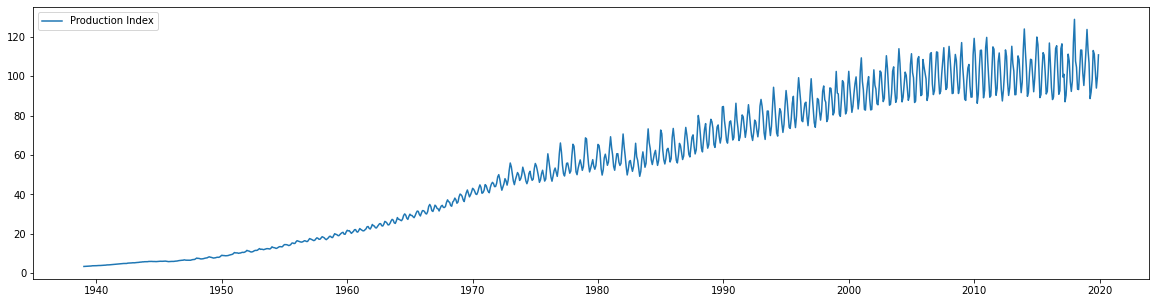

In [ ]:
x = data['observation_date']
y = data['IPG2211A2N']
plt.figure(figsize=(20, 5))
plt.plot(x, y, label = 'Production Index')
plt.legend()

Итак, перед нами график, который показывает изменение роста Индекса Промышленного Производства в сфере электроэнергетики и газоснабжения в США с 1929 года по наши дни. Уже можно сделать первый вывод о том, что он постоянно возрастает. Самое время оценить это, пользуясь изученными методами.

**1. Анализ минимума, максимума и скользящего среднего**

In [ ]:
df = pd.DataFrame({'Min': [data['IPG2211A2N'].min()], 'Max': [data['IPG2211A2N'].max()],'Mean': [data['IPG2211A2N'].mean()]})
df

,Min,Max,Mean
0,3.3842,128.9071,54.801967


Полученные цифры говорят нам о том, что  Индекс имеет значительный разброс в значениях с течением времени и в своем максимуме показал рост более чем в 38 раз. Среднее значение для данной выборки не является особо информативным, поэтому следует использовать скользящее среднее, задаваясь периодом в 1 год – rolling(12).

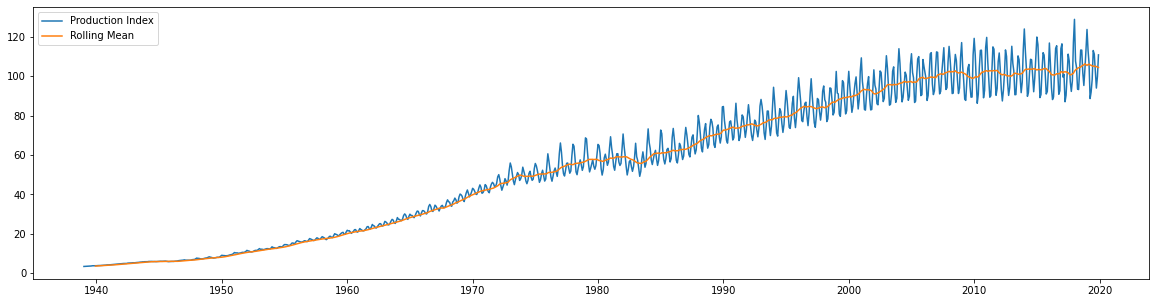

In [ ]:
data['PIroll_12'] = data['IPG2211A2N'].rolling(12).mean()
plt.figure(figsize=(20, 5))
plt.plot(x, y, label = 'Production Index')
plt.plot(x, data['PIroll_12'], label = 'Rolling Mean')
plt.legend()

Поведение линии скользящего среднего говорит о том, что присутствовали кратковременные периоды снижения роста Индекса (примерно каждые 10 лет начиная с 1980-х), что вероятно говорит о снижающемся спросе или других факторах в этой отрасли (геополитика, санкции, кризис, etc.). В целом же доминирует восходящая тенденция, а значит, что со временем индустрия лишь наращивала мощности.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


102.4385992424242

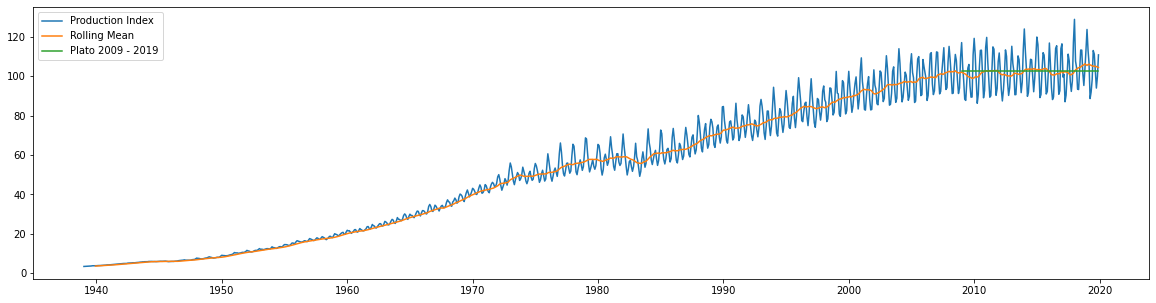

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(x, y, label = 'Production Index')
plt.plot(x, data['PIroll_12'], label = 'Rolling Mean')
plato = data[data['observation_date'].between('2009-01-01', '2019-12-01')]
plato['PImean'] = plato['IPG2211A2N'].mean()
plt.plot(plato['observation_date'], plato['PImean'], label = 'Plato 2009 - 2019')
plt.legend()
plato['PImean'][840] # вывод среднего значения для участка плато, в таблице столбец PImean с одинаковыми значениями, поэтому выводится любая строка

Отмечается, что в период с 2009 по 2019, основываясь на оценке среднего значения Индекса (все же пригодилась), наблюдается некое плато и колебание среднего около значения 102,44.

**2. Гистограмма, квантили**

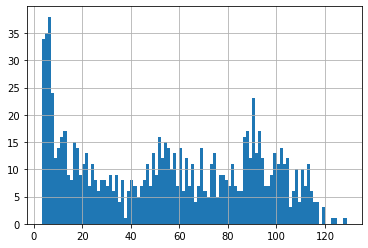

In [ ]:
data['IPG2211A2N'].hist(bins = 100)

Гистограмма позволяет оценить распределение статистических дан­ных, сгруппированных по частоте попадания в определенный (зара­нее заданный) интервал. Однако в данном случае тяжело оценить характер распределения. Варьируя параметр bins, можно лишь более или менее явно выделить максимумы в интервалах значений: 3,5 - 7,5; 50 - 55; 87 - 94 (цифры сняты по графику на глаз).
Для нашей выборки этот метод оценки мало информативен.
Возможно стоит выделить 3 области значений (по числу явных пиков) и отдельно исследовать распределение в них, но это выходит за пределы данной работы.


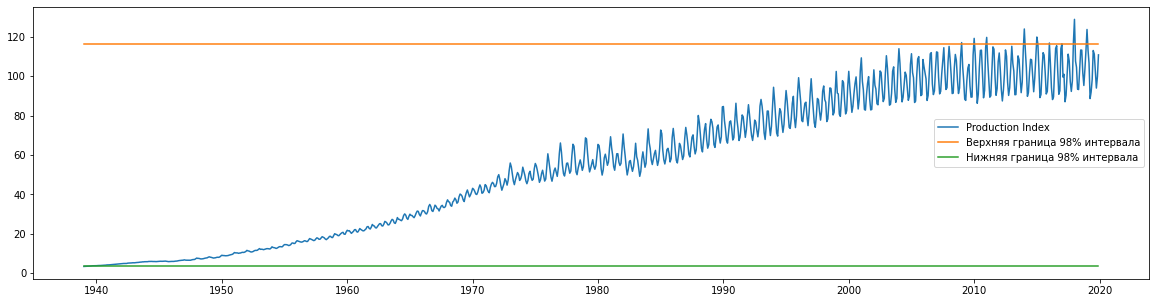

In [ ]:
x = data['observation_date']
y = data['IPG2211A2N']
data['Q99'] = data['IPG2211A2N'].quantile(0.99)
data['Q01'] = data['IPG2211A2N'].quantile(0.01)
plt.figure(figsize=(20, 5))
plt.plot(x, y, label = 'Production Index')
plt.plot(x, data['Q99'], label='Верхняя граница 98% интервала')
plt.plot(x, data['Q01'], label='Нижняя граница 98% интервала')
plt.legend()

За наш доверительный интервал выходит лишь малая часть значений. Конечно, они в дальнейшем скорее будут возрастать, но на данный момент мы их определяем как выбросы (пики в период с 2010 по 2019).

**3. Корреляция параметров**

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
data.corr()

,IPG2211A2N,PIroll_12,Q99,Q01
IPG2211A2N,1.00,0.99,0.00,0.00
PIroll_12,0.99,1.00,0.00,0.00
Q99,0.00,0.00,1.00,1.00
Q01,0.00,0.00,1.00,1.00


Так как на входе мы получаем данные лишь с одним варьирующимся параметром – значение Индекса, то корреляция не имеет смысла. Узнать наличие или отсутствие линейной связи между значениями не представляется возможным. 

**4. Автокорреляция, сезонность**

Анализируя график (локальные минимумы и максимумы) предположим, что с определенного момента существует корреляционная зависимость между настоящими и прошлыми значениями. 

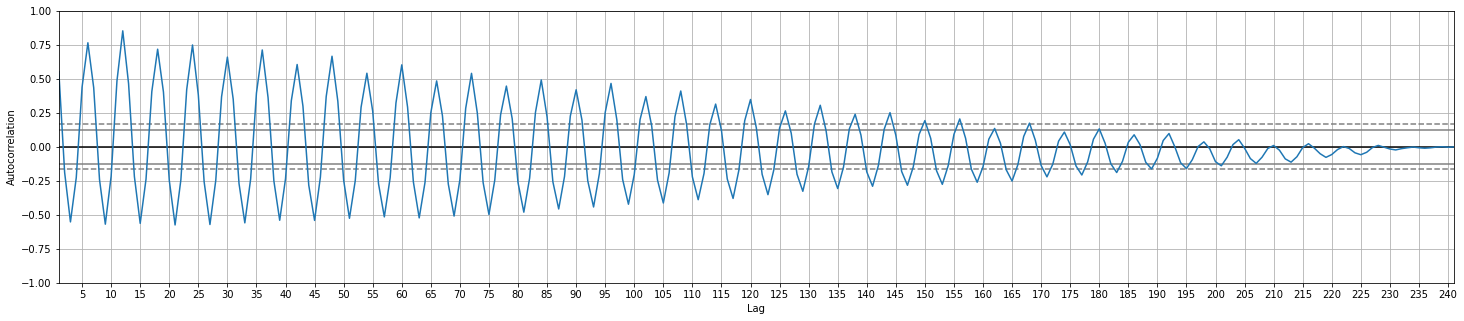

In [ ]:
data_auto = data[data['observation_date'].between('1999-12-01', '2019-12-01')]
plt.figure(figsize=(25, 5))
pd.plotting.autocorrelation_plot(data_auto['IPG2211A2N'])
plt.locator_params(axis='x', nbins=90)

Подбирая временной промежуток, получим следующие результаты: очевидно, исходя из значения лага, значения с определенного периода (в нашем случае с 1999 года) циклически повторяют сами себя через каждые пол-года. Это видимо связано с сезонностью потребления (лето-зима), так как данная отрасль относится к энергетическому сектору.

**5. Тренд**

Мы уже первично определили, что данные практически непрерывно возрастают, поэтому следующим шагом мы построим линию тренда (для этого используем модель линейной регрессии).

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = pd.DataFrame(data.index)
Y = data['IPG2211A2N']
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
trend = model.predict(X)

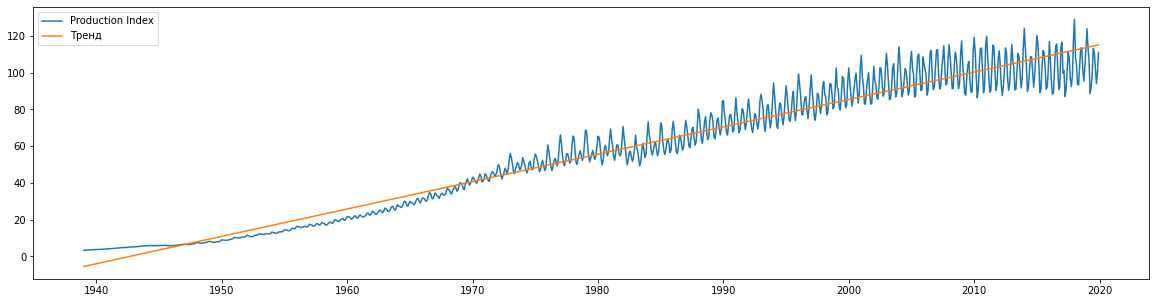

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data['observation_date'], data['IPG2211A2N'], label = 'Production Index')
plt.plot(data['observation_date'], trend, label = 'Тренд')
plt.legend()

In [ ]:
data['trend'] = trend
condition = data['trend'] > 3.38
new_data = data[condition]

Для удобства уберем с графика отрицательные значения тренда (сам характер поведения линии при этом не изменится).

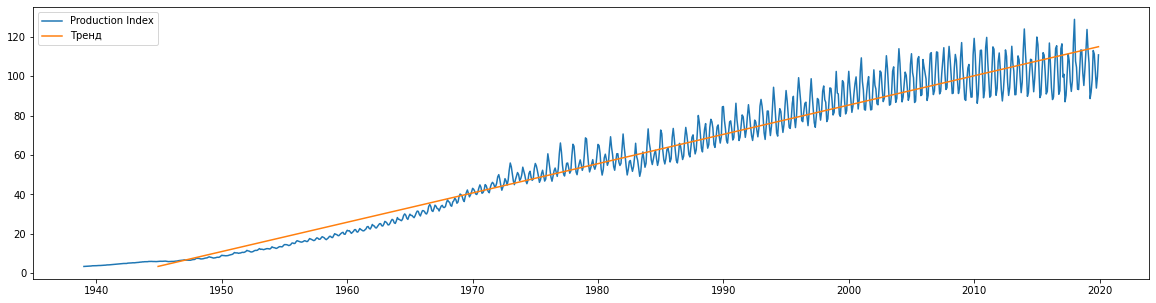

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data['observation_date'], data['IPG2211A2N'], label = 'Production Index')
plt.plot(new_data['observation_date'], new_data['trend'], label = 'Тренд')
plt.legend()

**6. Выводы**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


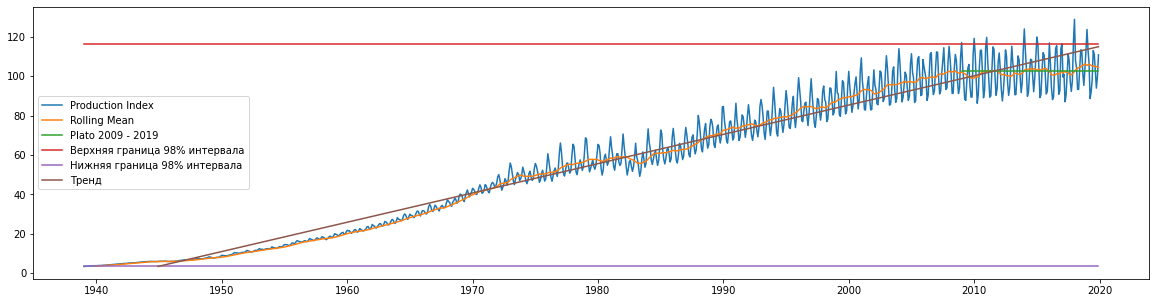

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(x, y, label = 'Production Index')
plt.plot(x, data['PIroll_12'], label = 'Rolling Mean')
plato = data[data['observation_date'].between('2009-01-01', '2019-12-01')]
plato['PImean'] = plato['IPG2211A2N'].mean()
plt.plot(plato['observation_date'], plato['PImean'], label = 'Plato 2009 - 2019')
plt.plot(x, data['Q99'], label='Верхняя граница 98% интервала')
plt.plot(x, data['Q01'], label='Нижняя граница 98% интервала')
plt.plot(new_data['observation_date'], new_data['trend'], label = 'Тренд')
plt.legend()

Выше представлен сводный график с насенными параметрами, которые мы анализировали.

Суммируя все результаты, можно сказать, что  производство в сфере электроэнергетики и газоснабжения в США монотонно росло с годами – об этом нам явно говорит линия тренда и скользящее среднее. Это не удивительно, ведь постоянно увеличивается население, улучшаются технологии, выпускается больше установок – в целом идет глобальный рост потребности населения в энергоресурсах. Ежегодно требуются все большие мощности для новых проектов, расширяющихся городов, строящихся заводов. Тем не менее, в последние годы темпы роста остаются на одном уровне, что вероятно связано либо с достижением предела спроса, либо ограниченностью мощностей производства. Эту тенденцию также подтверждает график, представленный ниже (Зависимость кол-ва произведенной энергии по типам источников).

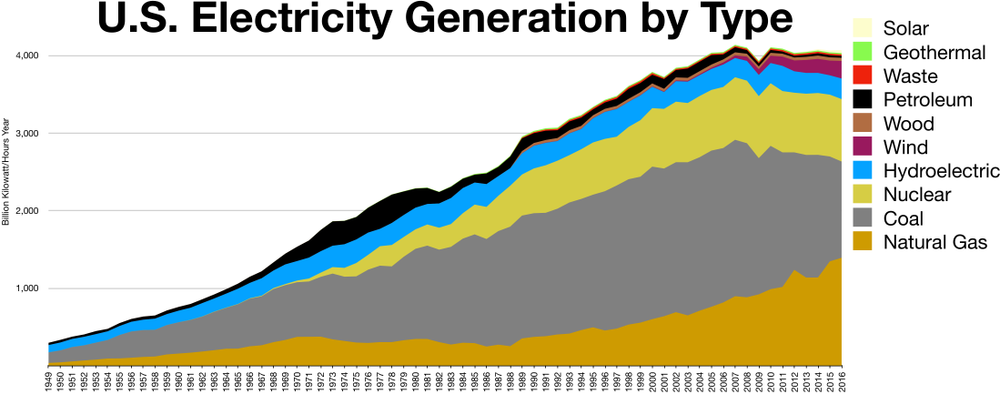